In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk


In [2]:
tweets= pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/Tweets.csv")
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
tweets.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [5]:
tweets.isnull().sum().sort_values(ascending=False)

negativereason_gold             14608
airline_sentiment_gold          14600
tweet_coord                     13621
negativereason                   5462
user_timezone                    4820
tweet_location                   4733
negativereason_confidence        4118
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_created                       0
dtype: int64

6.0
4.0


<AxesSubplot:ylabel='airline'>

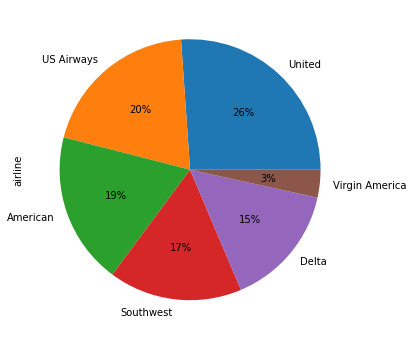

In [6]:
# PLot pie chart showing the airline split
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 
tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot:ylabel='airline_sentiment'>

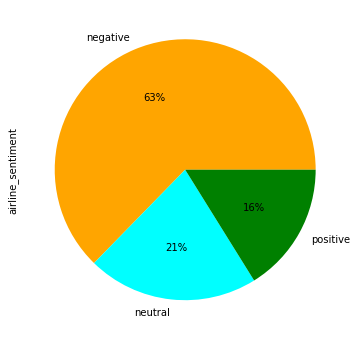

In [7]:
# Ratio of Negative to Neutral to Postive sentiments
tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',colors=["orange", "cyan", "green"])

<AxesSubplot:xlabel='airline'>

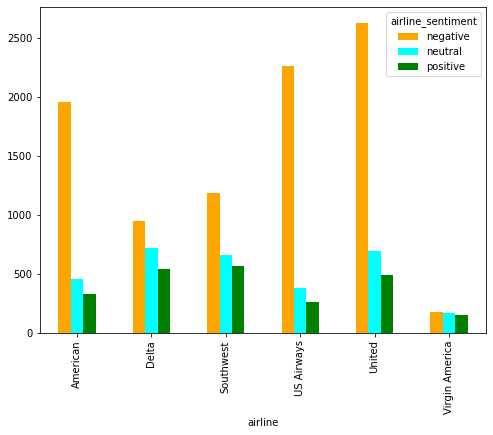

In [8]:
# Split of each airline
airline_sentiment = tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar',color=["orange", "cyan", "green"])

<AxesSubplot:xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

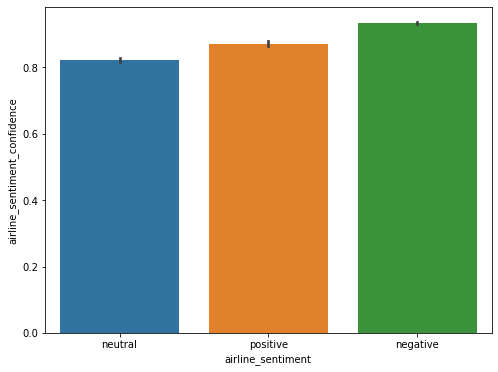

In [9]:
# Confident of our sentiment labels bing correctly labeled
# Remember a lot of 'sentiment' can be subjective, think sarcasm or slang
import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=tweets)

In [10]:
# Spliting the text and labels

# The text lies in column 10 (11th column)
features = tweets.iloc[:, 10].values

# The Airline labels lie in column 1 (2nd column)
labels = tweets.iloc[:, 1].values

In [14]:
#Cleaning the text using regex
processed_feature=[]
pf=[]

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # Remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    pf.append(processed_feature)

In [15]:
pf

[' virginamerica what dhepburn said ',
 ' virginamerica plus you ve added commercials to the experience tacky ',
 ' virginamerica didn today must mean need to take another trip ',
 ' virginamerica it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse',
 ' virginamerica and it a really big bad thing about it',
 ' virginamerica seriously would pay 30 flight for seats that didn have this playing it really the only bad thing about flying va',
 ' virginamerica yes nearly every time fly vx this ear worm won go away ',
 ' virginamerica really missed prime opportunity for men without hats parody there https co mwpg7grezp',
 ' virginamerica well didn but now do d',
 ' virginamerica it was amazing and arrived an hour early you re too good to me ',
 ' virginamerica did you know that suicide is the second leading cause of death among teens 10 24',
 ' virginamerica lt 3 pretty graphics so much better than minimal iconography d',
 ' virginamerica th

In [16]:
# Performing our vectoriztion using TF-IDF scheme from the Scikit-learn libary

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# We use max_features of 2500 which is the top 2500 most frequently occuring words to create our bag of words model
# max_df specifies that only use those words that occur in a maximum of 80% of the documents.
# min-df is set to 7 which shows that include words that occur in at least 7 documents. 
vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

# We use the vectorizer.fit_transform to transform our words into our processed features vector
processed_features_vec = vectorizer.fit_transform(pf).toarray()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features_vec, labels, test_size = 0.20, random_state = 0)

In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [20]:
y_pred = classifier.predict(X_test)

In [22]:
# Let's display the results of our classifier on our test dataset

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test, y_pred)))

[[640 455 775]
 [ 63 211 340]
 [ 28  53 363]]
              precision    recall  f1-score   support

    negative       0.88      0.34      0.49      1870
     neutral       0.29      0.34      0.32       614
    positive       0.25      0.82      0.38       444

    accuracy                           0.41      2928
   macro avg       0.47      0.50      0.40      2928
weighted avg       0.66      0.41      0.44      2928

Accuracy 41.46%


In [23]:
# We'll use the random forest algorithm to create our classifier 
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [24]:
# Let's obtain our predictions on our test dataset
predictions = text_classifier.predict(X_test)

In [25]:
# Let's display the results of our classifier on our test dataset

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test, predictions)))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

Accuracy 75.99%


In [27]:
# Obtain a test sample text from our test dataset

rand_index = np.random.randint(0,len(pf))
test_sample = pf[rand_index]
print(test_sample)

 virginamerica is the best airline have flown on easy to change your reservation helpful representatives amp comfortable flying experience


In [28]:
# Try our classifer on our text
vector = vectorizer.transform([test_sample])
output = text_classifier.predict(vector.toarray())
print("Sentiment is - " + str(output[0]))

Sentiment is - positive
